<a href="https://colab.research.google.com/github/af001/Northwestern-MSDS/blob/master/MSDS458/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[+] Running...


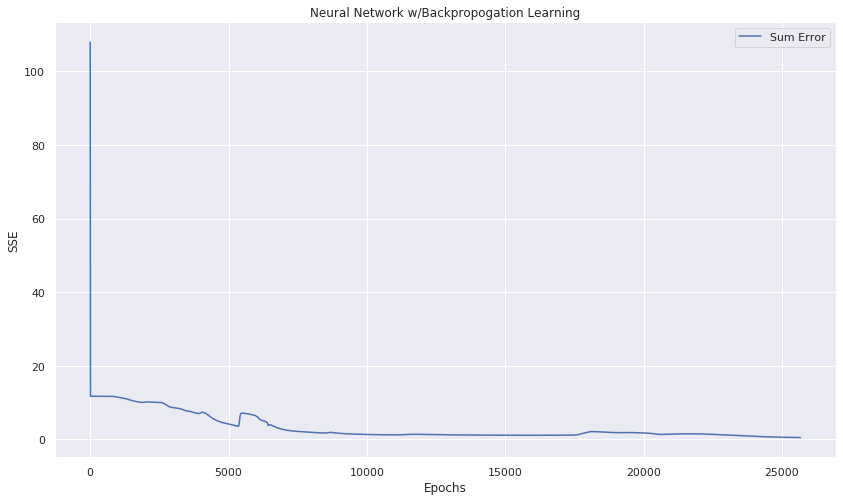

[+] Input->Hiden Weights: Hidden 1
[+] Input->Hiden Weights: Hidden 2
[+] Input->Hiden Weights: Hidden 3
[+] Input->Hiden Weights: Hidden 4
[+] Input->Hiden Weights: Hidden 5
[+] Input->Hiden Weights: Hidden 6
[+] Input->Hiden Weights: Hidden 7
[+] Input->Hiden Weights: Hidden 8
[+] Input->Hiden Weights: Hidden 9
[+] Input->Hiden Weights: Hidden 10
[+] Hidden->Output Weights: Output 1
[+] Hidden->Output Weights: Output 2
[+] Hidden->Output Weights: Output 3
[+] Hidden->Output Weights: Output 4
[+] Hidden->Output Weights: Output 5
[+] Hidden->Output Weights: Output 6
[+] Hidden->Output Weights: Output 7
[+] Hidden->Output Weights: Output 8
[+] Hidden->Output Weights: Output 9
[+] Hidden->Output Weights: Output 10

[+] Console output wrote to 20191229-193153.log!


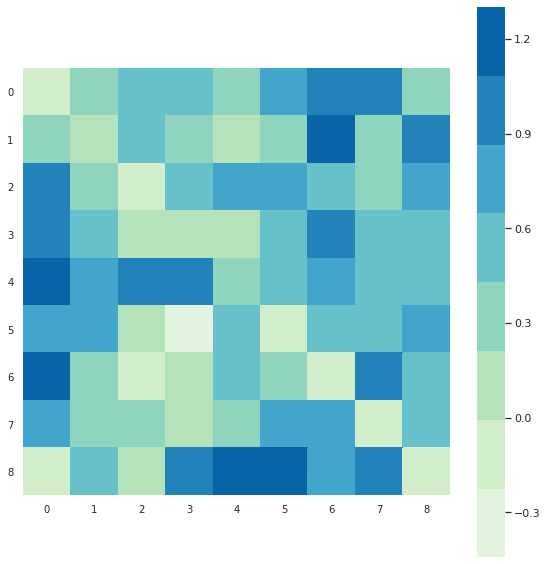

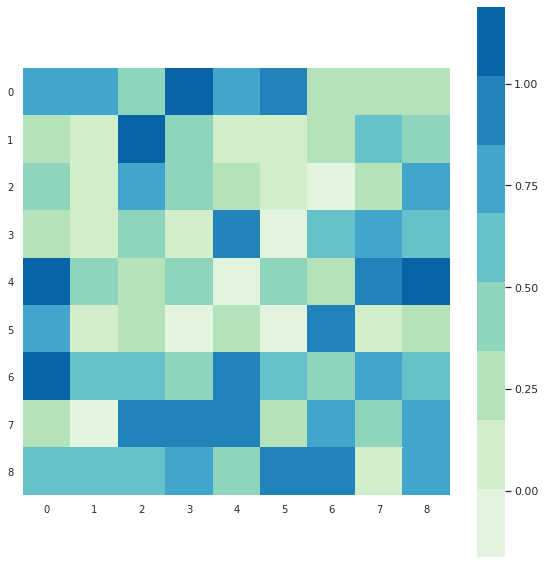

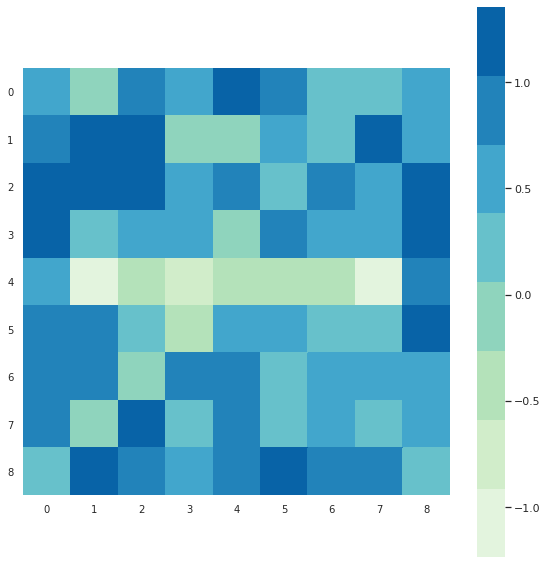

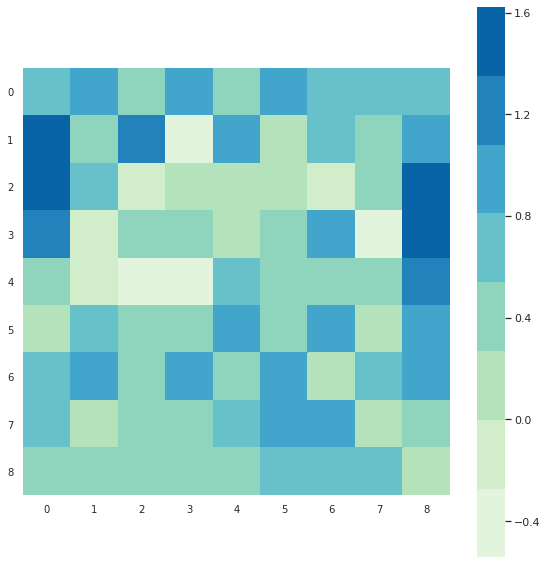

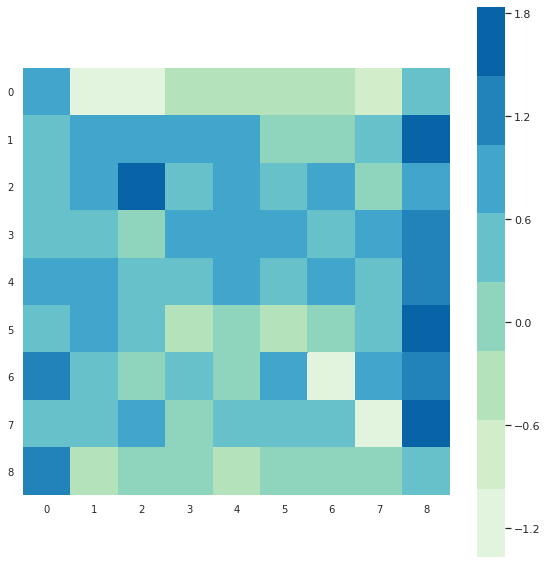

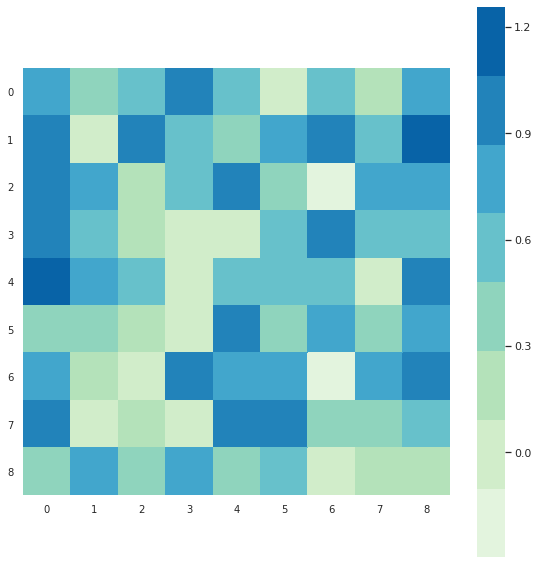

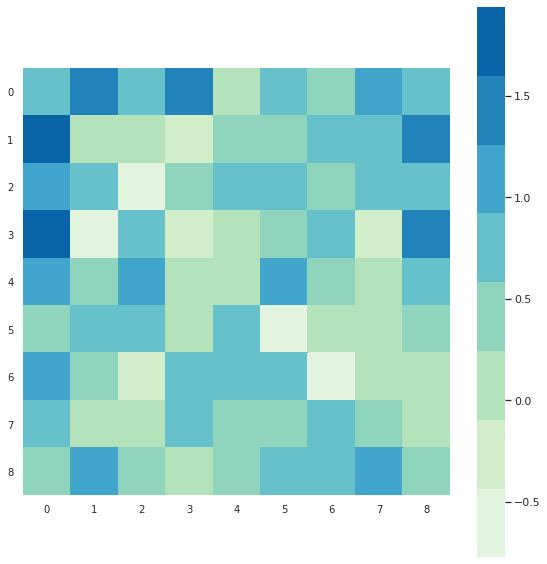

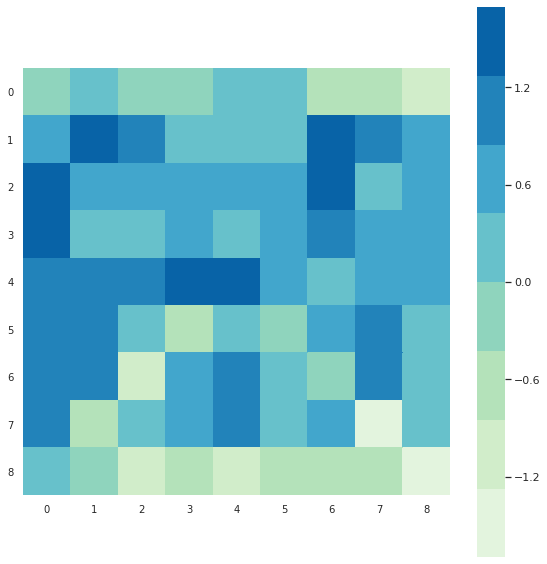

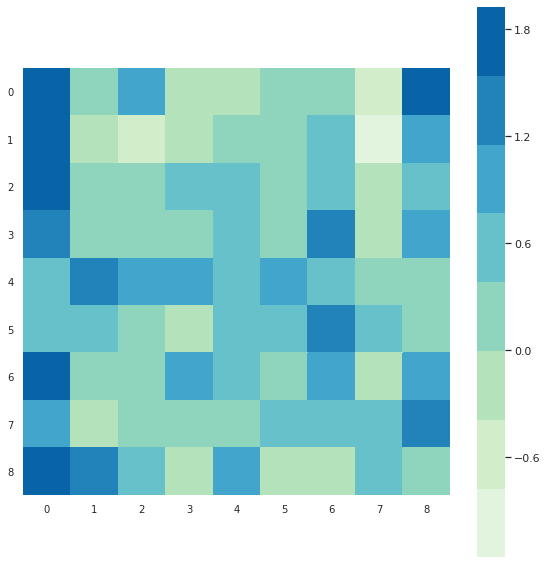

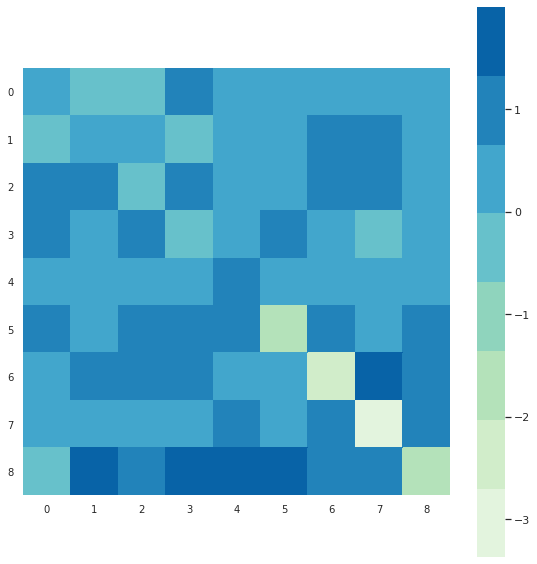

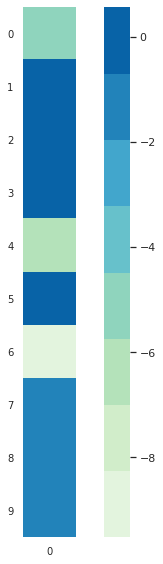

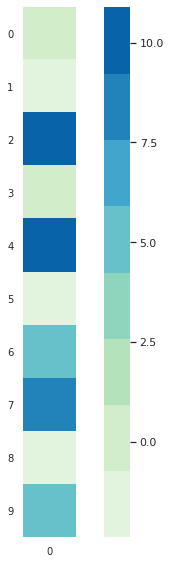

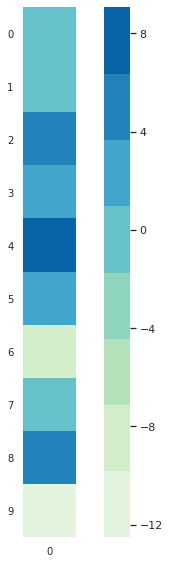

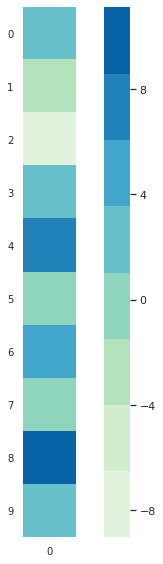

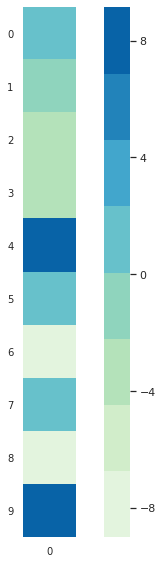

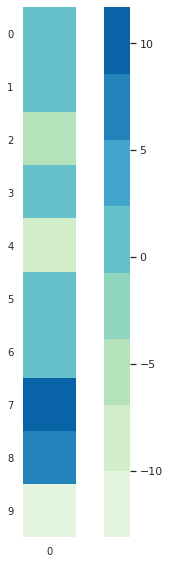

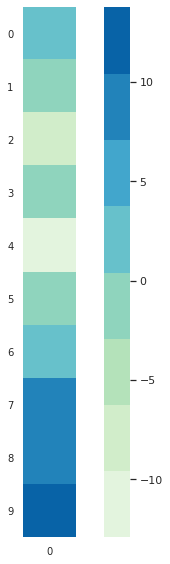

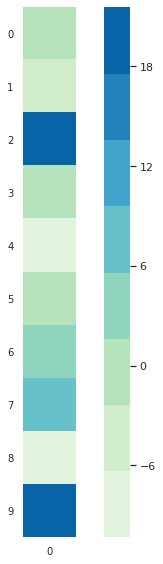

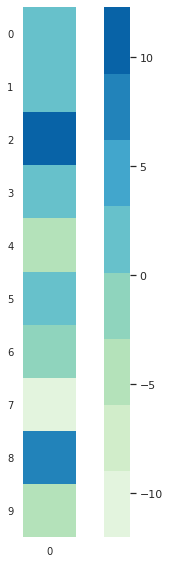

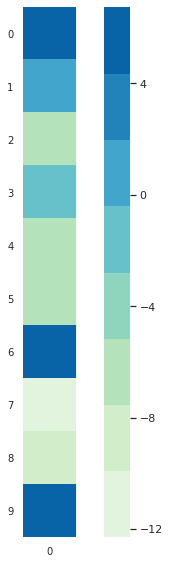

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author   : Anton Foltz
@date     : 10/13/2018
@class    : MSDS458
@professor: Dr. Maren
@reference: 
    https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
"""

import time
import logging
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt
from random import seed
from random import random
import seaborn as sns 

sns.set()
seed(4)

# 9 x 9 dataset -> X, M, N, H, A, R, B, O, Q, Z with variants O, R, and Q
dataset = [[1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1, 0], # X
           [1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1, 1], # M   
           [1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1, 2], # N
           [1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1, 3], # H
           [0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1, 4], # A
           [1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1, 5], # R
           [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1, 5], # R
           [1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0, 6], # B
           [0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0, 7], # O
           [0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0, 7], # O
           [0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1, 8], # Q
           [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1, 8], # Q
           [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1, 9]] # Z

# Define a dictionary to map numbers to letters
letters = {0: 'X', 1: 'M', 2: 'N', 3: 'H', 4: 'A', 5: 'R', 6: 'B', 7: 'O',
           8: 'Q', 9: 'Z'}

# Initialize a network using pre-determined number of input, hidden, 
# and output layers. Append values to network list
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

# Calculate neuron activation for an input. Neuron activation is calculated
# as the weighted sum of the inputs. 
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    
    return activation


# Transfer neuron activation. Once a neuron is activated, we need to 
# transfer the activation to see what the neuron output actually is
def transfer(activation, alpha):
    return 1.0 / (1.0 + exp(-alpha*activation))

# Forward propagate input to a network output. Store output and activation
# in neurons
activation_count = 0
def forward_propagate(network, row, alpha, predict, logger):
    global activation_count
    
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['activation'] = activation
            neuron['output'] = transfer(activation, alpha)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
        if predict:
            if activation_count == 0:
                logger.info(' > Hidden Activations={}'.format(inputs))
                activation_count+=1
            else:
                logger.info(' > Output Activations={}'.format(inputs))
                activation_count=0
            
    return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output, alpha):
    return alpha*output*(1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected, alpha):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'], alpha)

# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of iterations (epochs)
def train_network(network, train, l_rate, n_epoch, n_outputs, alpha, logger):
    logger.info('\n[+] Training Iterations:\n')
    
    # Keep track of the history for easier plotting
    error_history = []
    epoch_history = []
    
    # Start training
    for epoch in range(n_epoch):
        sum_error = 0
        
        for row in train:
            outputs = forward_propagate(network, row, alpha, False, logger)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected, alpha)
            update_weights(network, row, l_rate)
        
        epoch_history.append(epoch)
        error_history.append(sum_error)
        logger.info(' > epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        
        if sum_error < 0.5:
            break
      
    # Create a plot of the learning rate over epochs. This would be better
    # as a tensorflow graph, or matplotlib animation
    plt.figure(1, figsize=(14,8))
    plt.title('Neural Network w/Backpropogation Learning')
    plt.xlabel('Epochs')
    plt.ylabel('SSE')
    plt.plot(epoch_history, error_history)
    plt.legend(['Sum Error'])
    plt.grid(True)
    plt.show()
        
# Get the final predicted value from the output nodes. Arg max function 
def predict(outputs):
    return outputs.index(max(outputs))

# Make a predictions with a network. First receive raw values so that their
# values can be observed next to the predicted letter
def predict_raw(network, row, alpha, logger):
    return forward_propagate(network, row, alpha, True, logger)

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
## Neural-net w/backprop main function
def main():
    print('\n[+] Running...')
    
    # Set variables and neural-net parameters
    n_outputs = len(set([row[-1] for row in dataset])) # Num outputs
    n_inputs = len(dataset[0]) - 1                     # Num inputs
    n_hidden = 10                                      # Num hidden nodes
    iterations = 200000                                # Num epochs
    eta = 0.20                                         # Learning rate
    alpha = 0.65
    
    # Create a unique log file name for testing different configurations
    logfile_name = time.strftime('%Y%m%d-%H%M%S')
    #logfile_name = '{}-{}-{}.log'.format(logfile_name, iterations, n_hidden)
    logfile_name = '{}.log'.format(logfile_name)

    # Start logging
    logger = logging.getLogger(__name__)
    logger.setLevel(logging.INFO)
    
    # Create a file handler for logging
    handler = logging.FileHandler(logfile_name)
    handler.setLevel(logging.INFO)
    
    # Create a logging format
    formatter = logging.Formatter('%(message)s')
    handler.setFormatter(formatter)
    
    # Add the handlers to the logger
    logger.addHandler(handler)

    # Show network details 
    logger.info('[+]  Network Details:\n')
    logger.info('  Number Inputs  : {} ({}x{})'.format(n_inputs, int(sqrt(n_inputs)), int(sqrt(n_inputs))))
    logger.info('  Number Hidden  : {}'.format(n_hidden))
    logger.info('  Number Outputs : {}'.format(n_outputs))

    # Initialize the netork and train the neural-net using backpropogation 
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    train_network(network, dataset, eta, iterations, n_outputs, alpha, logger)
        
    # Display weights, bias (last entry in weights), delta (change in error), 
    # activation, and output for each neuron 
    count = 0
    for layer in network:
        # Display the correct banner
        if count == 0:
            logger.info('\n[+] Input -> Hidden Details:')
        elif count == 1:
            logger.info('\n[+] Hidden -> Output Details:')
        
        # Show layer details. Note: bias is the last value under weights
        node_count = 1
        for neuron in layer:
            if count == 0:
                logger.info('\nHidden Node: {}'.format(node_count))
                logger.info(neuron)
                
                print('[+] Input->Hiden Weights: Hidden {}'.format(node_count))
                weights = neuron['weights'][:-1]
                weights = np.array((weights))
                weights_res=weights.reshape(9,9)
                fig, ax = plt.subplots(figsize=(8,8))
                sns.heatmap(weights_res, square=True, ax=ax, cmap=sns.color_palette('GnBu', 8))
                plt.yticks(rotation=0,fontsize=10);
                plt.xticks(fontsize=10);
                plt.tight_layout()
                plt.savefig('weight_hidden_{}.png'.format(node_count))
            else:
                logger.info('\nOutput Node: {}'.format(node_count))
                logger.info(neuron)
                
                print('[+] Hidden->Output Weights: Output {}'.format(node_count))
                weights = neuron['weights'][:-1]
                weights = np.array((weights))
                weights_res=weights.reshape(10,1)
                fig, ax = plt.subplots(figsize=(8,8))
                sns.heatmap(weights_res, square=True, ax=ax, cmap=sns.color_palette('GnBu', 8))
                plt.yticks(rotation=0,fontsize=10);
                plt.xticks(fontsize=10);
                plt.tight_layout()
                plt.savefig('weight_output_{}.png'.format(node_count))
                
            node_count+=1
        count+=1
    
    # Verify neural-net and display more granular details in the output layer
    logger.info('\n[+] Verify model predictions:\n')
    logger.info('++++++++++++++++++++++++++++++++++++++++++\n')
    for row in dataset:
        logger.info(' > Input={}'.format(row))
        raw_prediction = predict_raw(network, row, alpha, logger)
        
        prediction = predict(raw_prediction)                     
        logger.info(' > Output={}'.format(raw_prediction))
        logger.info(' > Expected={}, Got={}'.format(letters[row[-1]], letters[prediction]))
        logger.info('\n++++++++++++++++++++++++++++++++++++++++++\n')
        
    print('\n[+] Console output wrote to {}!'.format(logfile_name))
    
if __name__ == "__main__": 
    main()